In [1]:
# print out each line in the input cell not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# expand the cell width to 70% of t 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

*Gruppe: Emils Bundzis, Chris Fröschl, Simon Gärtner*

# Kleines Projekt 3: Stufen Aufgabe

## Modellierung eines Stufenabschnittes an einem Berghang

# Dokumentation und SageMath Skript

----

*Wir haben uns dazu entschlossen, die Dokumentation in das SageMath Skript einzubinden. Daher finden Sie hier eine ausführliche Erklärung des Problems, des Skriptes, der Ergebnisse und der Arbeitsaufteilung.*

## Problembeschreibung
---

Diese Arbeit ist im Rahmen einer vierten Übungsaufgabe in der Vorlesung "Angewandte Mathematik" entstanden.

Es soll ein Weg auf einen Hügel gepflastert bzw. asphaltiert werden. Dafür gibt es einige Anforderungen, welche den Entscheidungsweg zwischen Stufe und Alsplalt bestimmen.

Annahmen:

- Der Weg muss 1,20 m breit sein.
- Asphaltiert werden kann nur, wenn die Steigung kleiner als 1/3 ist
- Die Stufen sind genau 0,20m hoch
- Stufen müssen keine praktikable Länge haben
- Hügelstruktur ist vorgegeben:
    
| Abstand von der Hügelspitze | Höhe des Hügels |
|-----------------------------|-----------------|
| 0                           | 50              |
| 20                          | 47              |
| 40                          | 43              |
| 60                          | 38              |
| 80                          | 32              |
| 100                         | 25              |
| 120                         | 17              |
| 140                         | 8               |
| 160                         | 6               |
| 180                         | 2               |
| 200                         | 0               |


## Mathematisches Modell
---

### Mathematische Problemformulierung

Zur Darstellung der tatsächlichen Hügelstruktur (durch Tabellenwerte) müssen der Abstand von der Hügelspitze und die Höhe des Hügels gebündelt als Koordinaten abspeichert werden.

Das Zahlenpaar (40, 43) bedeutet z.B., dass im horizontalen Abstand
von 40m von der Hügelspitze der Hügel 43 m hoch ist.

Diese Daten müssen daraufhin als Gleichungssystem der Struktur

$$
y = w_3 * x^3 + w_2 * x^2 + w_1 * x + w_0.
$$

dargestellt werden.

Die Gleichungssysteme als Verbund sind jedoch nicht mit einem Polynom der 3. Ordnung lösbar. Um es exakt lösen zu können bräuchte man mindestens ein Polynom des Grades der Anzahl der Gleichungssysteme. Hier 11.

Die Gleichungssysteme können jedoch mittels einer Annährung gelöst werden. Diese Methode heißt auch Methode der kleinsten Quadrate (eng. least square) und wird allgemein dazu verwendet, um eine Datensammlung mit möglich geringen Fehler anzunähern.

![Bild 1](https://upload.wikimedia.org/wikipedia/commons/1/17/MDKQ1.svg)

Um die Anzahl der benötigten Stufen zu bestimmen, wurde folgender Algorithmus ausgearbeitet:

![Bild 2](get-all-stairs.png)


1. Zunächst werden die Bereiche, in welchen die Steigung größer als 1/3 berechnet. Dies sind die Intervalle, in welchen Treppen platziert werden müssen. Dafür wird einfach die Ableitung der approxmierten Funktion gebildet und als lineares Gleichungssystem auf > $1/3$ für die jeweiligen Intervalle aufgelöst.
2. Von diesen Bereichen wird jeweil die Höhendifferenz bestimmt.
3. Die Höhendifferenz wird dazu verwendent, um die nötige Anzahl der Stufen mit der vom Setup gegebenen Stufenhöhe zu bestimmen
4. Durch die nun gegebene Anzahl der Stufen kann die Länge der Stufen berechnet werden

Da die letzte Stufe meistens in einer Gleikommazahl endet, wird diese als einzige Stufe kürzer als ihre Vorgänger.

Bei diesem Lösungsansatz haben die Stufen jeweils das gleiche Gefälle. Dies funktioniert recht gut, solange unser Gefälle des Hügels nicht zu radikale Änderungen erfährt. Falls doch, kann dies eine Abtragung von Hügelmasse voraussetzen, um die Stufen tatsächlich platzieren zu können.

TODO Bild

Die Länge des Asphaltierten Wegs ergibt sich aus der Differenz zu den bestuften Bereichen.

Dabei lässt sich die Länge einer Kurve $y = f(x)$ im Bereich $[a, b] ⊆ R$ durch das Integral

$$
\int_a^b \sqrt{1 + (f'(x))^2}
$$

berechnen.

### Verwendete Software für die Ergebnisberechnungen

- SageMath

## Implementierung in SageMath & Analyse und Deutung der Ergebnisse
---

### Aufgabe 1

Zunächst wurden die aus der Aufgabenstellung gegebenen Punkte in einem Array aus Tupeln $points$ gespeichert.

Die Gleichungssysteme werden mittels der Funktion $createFunctions(points)$ erzeugt.

Zunächst wurde versucht, mit der Funktion $getExactSolution$ eine exakte Lösung zu finden. Hier versagt jedoch SageMath wie erwartet, da keine exakte Lösung mit unserer Polynomstruktur existiert.

Daraufhin wurde mittels $getApproxSolution$ eine Annährung für die Lösung der Gleichungssysteme gefunden.

In [2]:
# define all parameters
w0, w1, w2, w3, x = var('w0', 'w1', 'w2', 'w3', 'x')

# define approx model
model(x) = w0 + w1*x + w2*x**2 + w3*x**3

# define stair heigt
stair_height = 0.2

# define width of the street
width = 1.2

# define points
points = [(0, 50), (20, 47), (40, 43), (60, 38), (80, 32), (100, 25), (120, 17), (140, 8), (160, 6), (180, 2), (200, 0)]

# define max gradient
max_gradient = 1/3

In [3]:
def createFunction(x, y):
    """
    Create function (polynom - thrid degree).
    
    Parameters:
        x(float): defines the x value of the function.
        
        y(float): defines the y value of the function.
        
    Returns:
        mathematical function: contains the defined values.
    """
    return w0 + w1*x + w2*x**2 + w3*x**3 == y

In [4]:
def getAllFunctions(points):
    """
    Create a list with functions. For each point one. Have the unknown w0, w1, w2 and w3. Creates a list for a linear equation system.
    
    Prameters:
        points(list): contains all specified points.
        
    Returns:
        list: contains all functions for the linear equation system.
    """
    functions = []

    for point in points:
        functions.append(createFunction(point[0], point[1]))
    
    return functions

In [5]:
def getExactSolution(points, model):
    """
    Try to solve the linear equation system exactly.
    
    Parameters:
        points(list): contains all specified points.
        
        model(mathematical function): plonomial third degree.
        
    Returns:
        list: contains all values for w0, w1, w2 and w3.
    """
    return solve(getAllFunctions(points), w0, w1, w2, w3)

In [6]:
def getApproxSolution(points, model):
    """
    If there is no excat solution solve the equation approximately.
    
      Parameters:
        points(list): contains all specified points.
        
        model(mathematical function): plonomial third degree.
        
    Returns:
        dict: contains all values for w0, w1, w2 and w3.
    """
    return find_fit(points,model,solution_dict=True)

In [7]:
def plotPointsAndFunction(approx, points):
    """
    Plot the approximated function and all the points.
    
    Parameters:
        approx(dict): contains all approximated values for the function.
        
        points(list): contains all specified points.
    
    Returns:
        graphical object: contains all plots.
    """
    g = Graphics()
    
    g = plot(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3, xmax = 200, ymax = 50, legend_label='Approxmierte Funktion f', axes_labels=['Horizontal length', 'Height'], frame=True)

    for element in points:
        g += point(element, color='red', size=30)
        
    return g

### Aufgabe 2

In [8]:
def defineFunction(approx, x):
    """
    Calculate function using an approxmation dictonary.
    
    Parmeters:
        approx(dict): Dictonary of approxmation values for the coefficients.
        
        x(float): The input value for which the function will be evaluated.
    
    Returns:
        float: value of function or function itself when x is trasmitted for x
    
    """
    return approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3

In [9]:
def getDiffOfFunction(func):
    """
    Calcuate the derivation of a function.
    
    Parameters:
        func(mathematical function): Function which should be derive.
        
    Returns:
        mathematical function: derivation of the transmitted function.
    """
    return diff(func)

In [10]:
def getGradient(func, x):
    """
    Claculate value of a function at a specific point.
    
    Parameters:
        func(mathematical function): function which should be evaluated.
        
        x(float): specifc x value.
    
    Returns:
        float: y value of function at the definied x value.
    """
    return func(x)

In [11]:
def getGradientExact(func, max_gradient):
    """
    Calculate intervals where the gradient is bigger or equal 1/3.
    
    Parameters:
        func(mathematical function): function which schould be evaluated.
        
    Returns:
        list: contains all intervals where the gradient is bigger or equal 1/3.
    """
    sol = solve(func == max_gradient * -1, x, solution_dict = true)
    
    intervals = []
    
    for index in range(0, len(sol), 2):
        intervals.append((round(sol[index][x], 20), round(sol[index+1][x], 20)))
    
    return intervals

In [12]:
def getAllStairs(intervals, func):
    """
    Calculate and collect all information about the stair intervals.
    
    Parameters:
        intervals(list): contains start and end point of stair interval.
        
        func (mathematical function): function in which the stairs are.
    
    Returns:
        list[dict]: returns a list which include a dictonary with all information about one stair interval.
    """

    allStairs = []

    for interval in intervals:

        difference = abs(getGradient(func, interval[0]) - getGradient(func, interval[1]))

        amountOfStairs = difference / stair_height

        averageLength = (interval[1] - interval[0]) / amountOfStairs

        allStairs.append({'start' : interval[0], 'end': interval[1], 'stair_length': averageLength, 'amountOfStairs': amountOfStairs, 'difference': difference})

    return allStairs

In [13]:
def printInformationAsTable(intervals, stair_height):
    """
    Create a table with all stair information.
    Contains:   - height of stair
                - length of stair
                - amount of stairs with this properties
    
    Parameter:
        intervals(list[dict]): contains all information about the stair intervals.
        
        stair_height(float): defines the height of the stairs (global variable).
        
    Returns:
        Table: with the properties of all stairs.
    """
    
    content = []
    
    for interval in intervals:
        full_stairs = floor(interval['amountOfStairs'])
        roundLength = round(interval['stair_length'], 2)
                
        content.append([round(stair_height, 2), roundLength, full_stairs])
        
        smallerLength = interval['stair_length'] * (interval['amountOfStairs']- full_stairs)
        smallerLength = round(smallerLength, 2)
        
        content.append([round(stair_height, 2), smallerLength, 1])
    
    return table(content, header_row=['Stair height', 'Stair Length', 'Amount'], frame=True, align='center')

In [14]:
def paintStairIntervals(intervals, approx):
    """
    Plot the approximate function and mark the stairs area.
    
    Parameters:
    
        intervals(list): contains all information about the stair intervals.
        
        approx(dict): approxmiate coefficients of function.
    
    Returns:
        graphical object: contains all plots.
    """

    g = Graphics()

    g = plot(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3, xmax = 200, ymax = 50, legend_label='Approxmierte Funktion f', axes_labels=['Horizontal length', 'Height'], frame=True)


    for interval in intervals:
        g += plot(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3, color='red', xmin=interval[0], xmax=interval[1], thickness = 2, legend_label='Steigung zu groß für Asphalt', axes_labels=['Horizontal length', 'Height'], frame=True)

    return g

In [15]:
def plotBothFunctions(approx):
    """
    Plot two functions. The transmitted one and the derivation of this function.
    
    Parmeters:
        approx(dict): approxmiate coefficients of function.
        
    Returns:
        graphical object: contains all plots.
    """
    g = Graphics()
    
    g = plot(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3, xmax = 200, ymax = 50, ymin = -10, thickness = 2, legend_label='Approximierte Funktion f', axes_labels=['Horizontal length', 'Height'], frame=True)

    g += plot(diff(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3), xmax = 200, ymax = 50, ymin = -10, color='red', thickness = 2, legend_label='Abgeleitete Funktion von f', axes_labels=['Horizontal length', 'Height'], frame=True)

    return g    

### Aufgabe 3

In [16]:
def getLength(func, start, end):
    """
    Calculate the length of the function in a specific interval.
    
    Parameters:
        func(mathematical function): function which should be measured.
        
        start(float): starting x point.
        
        end(float): end x point.
    
    Returns:
        float: length of the function in this interval.
    """
    return integral(sqrt(1 + (func) ** 2), x, start, end)

In [17]:
def getAsphaltLength(func, stairInterval):
    """
    Calculate the length of the asphalt street.
    
    Parameters:
        func(mathematical function): function which should be measured.
        
        stairInterval(list[dict]): list with all stair intervals -> no asphalt.
        
    Returns:
        float: length of asphalt.
    """

    length = getLength(func, 0, 200)

    for interval in stairInterval:

        length -= getLength(func, interval['start'], interval['end'])

    return length

### Aufgabe 4

- Asphaltieren: 20 EUR/Quadratmeter
- Stufen: 30 EUR/Quadratmeter (nur horizontale Fläche)

Da die Länge des Asphalts schon in Aufgabe 3 berechnet wurde, kann der Preis ganz einfach berechnet werden:

$$
Preis Asphalt = AsphaltLänge * Wegbreite * AsphaltPreis
$$

Die Kosten der Stufen ist hier selbstverständlich an die zuvor berechneten Stufenintervalle aus Aufgabe 2 gebunden. Dabei iterieren wir über die Intervalle und summieren pro Intervall

$$
IntervallKosten = ( IntervallEnde - IntervallBeginn ) * Wegbreite * 30
$$

In [18]:
def costCalculationAsphalt(length, width):
    """
    Calculate costs of asphalt.
    
    Parameters:
        length(float): length of asphalt.
        
        width(float): width of the street.
        
    Returns:
        float: costs of asphalt -> rounded of two decimal places.
    """
    return round(length * width * 20, 2)

In [19]:
def costCalculationStairs(intervals, width):
    """
    Calculate costs of stairs.
    
    Parameters:
        intervals(list[dict]): contains all information about one stair interval.
        
        width(float): width of the street.
    
    Returns:
        float: costs of the stairs -> rounded of two decimal places.
    """
    costs = 0

    for interval in intervals:
        costs += (interval['end'] - interval['start']) * width * 30

    return round(costs, 2)

## Ablauf komplettes Programm

### Hügelpunkte plotten und durch Polynom dritten Grades approximieren

In [20]:
approx = getApproxSolution(points, model)
f(x) = defineFunction(approx, x)

print('Approximierte Funktion:')
f

Approximierte Funktion:


x |--> (1.175213765043847e-05)*x^3 - 0.003444056228566775*x^2 - 0.02742810366645668*x + 49.46853109925234

### Funktion f ableiten, um Steigung an unterschiedlichen Punkten zu ermitteln

In [21]:
f_2(x) = getDiffOfFunction(f)

print('Abgeleitete Funktion f:')
f_2

Abgeleitete Funktion f:


x |--> (3.525641295131541e-05)*x^2 - 0.00688811245713355*x - 0.02742810366645668

### Funktion f mit Hügel-Punkte plotten

Funktion f mit Hügelpunkten:


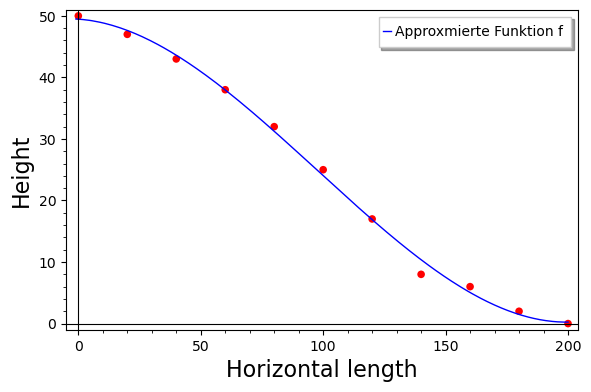

In [22]:
print('Funktion f mit Hügelpunkten:')
plotPointsAndFunction(approx, points)

### Funktion f und deren Ableitung f' in einem Plot darstellen

Funktion f und deren Ableitungsfunktion:


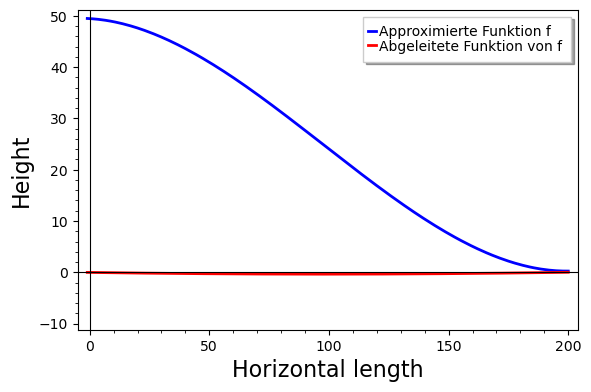

In [23]:
print('Funktion f und deren Ableitungsfunktion:')

plotBothFunctions(approx)

### Bereich der Funktion f berechnen, in denen die Steigung zu groß ist

Intervalle in denen die Steigung zu groß für Asphalt ist:


[(68.25873583808355, 127.11316619418382)]

Intervall markiert im Plot:


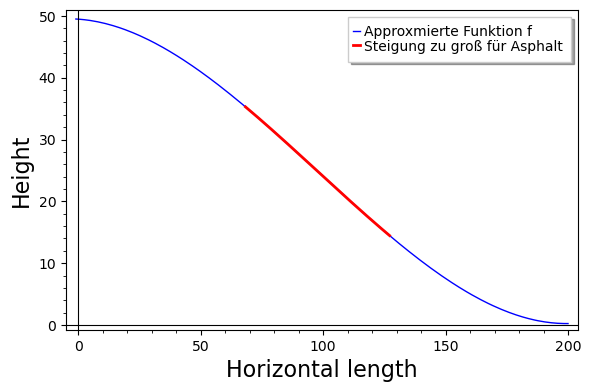

In [24]:
intervals = getGradientExact(f_2, max_gradient)

print('Intervalle in denen die Steigung zu groß für Asphalt ist:')
intervals

print('Intervall markiert im Plot:')
paintStairIntervals(intervals, approx)

### Ermittlung genauerer Informationen zu den einzelnen Stufenintervallen

In [25]:
intervals = getAllStairs(intervals, f)

print('Exakte Informationen zu jedem Stufenintervall:')
intervals

print('Ausgabe als Tabelle: ')
printInformationAsTable(intervals, stair_height)

Exakte Informationen zu jedem Stufenintervall:


[{'start': 68.25873583808355,
  'end': 127.11316619418382,
  'stair_length': 0.5654715405330049,
  'amountOfStairs': 104.08026954039981,
  'difference': 20.81605390807996}]

Ausgabe als Tabelle: 


Stair height,Stair Length,Amount
,,
,,


### Ermittlung der Asphaltlänge

In [26]:
length = getAsphaltLength(f_2, intervals)

print('Länge auf der aphaltiert werden muss:')
round(length, 2)

// Giac share root-directory:/usr/share/giac/


Länge auf der aphaltiert werden muss:


// Giac share root-directory:/usr/share/giac/
Added 0 synonyms


144.57

### Kostenermittlung für Asphalt und Stufen

In [27]:
costsAsphalt = costCalculationAsphalt(length, width)
costsStairs = costCalculationStairs(intervals, width)

print('Kosten für Asphalt:')
costsAsphalt

print('Kosten für Stufen:')
costsStairs

Kosten für Asphalt:


3469.73

Kosten für Stufen:


2118.76

### Gesamtkosten

In [28]:
combinedCosts = costsAsphalt + costsStairs

print('Gesamtkosten:')
combinedCosts

Gesamtkosten:


5588.49

## Ergebnisse und Deutung
---

Inhalt folgt

## Fazit
---

Das Projekt hat sein erhofftes Ergebnis erreicht.

Die Hügeldaten konnten mittels SageMath implementiert, visualisiert und beurteilt werden.

Ebenso konnten die Stufenzahl, die Länge der asphaltierten Stücke und die Kosten des gesamten Weges berechnet werden.

**HIER VIELLEICHT NOCH ERGÄNZEN: PROBLEM MIT GLEICHER STUFENGRÖßE - ANSONSTEN NOCH PROBLEME MIT UNGEFÄHRER ABSCHÄTZUNG DES HÜGELS ???**

## Arbeitsaufteilung
---

- Chris Fröschl: Dokumentation, mathematische Modellierung
- Simon Gärtner: Aufgabe 1, 2, 3, 4 Dokumentaiton, mathematische Modellierung
- Emils Bundzis: Dokumentation, mathematische Modellierung

## Literatur
---

### Bildquellen

- Bild 1: https://upload.wikimedia.org/wikipedia/commons/1/17/MDKQ1.svg